# Proyek Analisis Data : Bike Sharing Dataset
- Nama : Baiq Putri Suartikha
- Email : baiqputrisuartikha239@gmail.com
- ID Dicoding : Baiqputris

# Menentukan Pertanyaan Bisnis
- Apakah ada perbedaan dalam peminjaman sepeda di hari kerja dan akhir pekan? Bagaimana hari libur memengaruhi tren peminjaman sepeda?
- Bagaimana penggunaan sepeda berkaitan dengan waktu dalam sehari? Apakah ada puncak waktu tertentu di mana permintaan sepeda lebih tinggi?

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'numpy'

# Data Wrangling

## Gathering Data
#### Background
Sistem berbagi sepeda adalah inovasi dari persewaan sepeda tradisional dengan proses otomatis untuk keanggotaan, penyewaan, dan pengembalian. Pengguna dapat menyewa sepeda dari satu lokasi dan mengembalikannya ke lokasi lain. Saat ini, terdapat lebih dari 500 program berbagi sepeda di dunia dengan lebih dari 500 ribu sepeda, yang berkontribusi pada transportasi, lingkungan, dan kesehatan.

Sistem ini menghasilkan data unik yang dapat digunakan untuk penelitian, berbeda dari transportasi lain seperti bus atau kereta. Dengan mencatat durasi perjalanan serta lokasi awal dan akhir, sistem berbagi sepeda berfungsi sebagai jaringan sensor virtual untuk mendeteksi mobilitas kota dan mengidentifikasi peristiwa penting melalui analisis data.

#### Dataset
Pola persewaan sepeda sangat dipengaruhi oleh faktor lingkungan dan musim seperti cuaca, curah hujan, hari, musim, dan jam dalam sehari. Dataset ini mencakup data historis selama dua tahun (2011–2012) dari sistem Capital Bikeshare di Washington D.C., dikumpulkan setiap dua jam dan harian. Data cuaca diperoleh dari freemeteo.com.

#### Dataset characteristics
Dataset terdiri dari hour.csv dan day.csv, dengan beberapa variabel utama:

- instant: indeks data
- dteday: tanggal
- season: musim (1: semi, 2: panas, 3: gugur, 4: dingin)
- yr: tahun (0: 2011, 1: 2012)
- mnth: bulan (1–12)
- hr: jam (hanya di hour.csv, 0–23)
- holiday: hari libur atau tidak
- weekday: hari dalam seminggu
- workingday: hari kerja (1: bukan akhir pekan/libur, 0: lainnya)
- weathersit: kondisi cuaca (1: cerah, 2: berkabut, 3: hujan ringan/salju, 4: hujan lebat/salju tebal)
- temp, atemp: suhu normalisasi
- hum: kelembaban normalisasi
- windspeed: kecepatan angin normalisasi
- casual: jumlah penyewa non-anggota
- registered: jumlah penyewa terdaftar
- cnt: total penyewa (casual + registered)

In [ ]:
# load days data
days_df = pd.read_csv('day.csv')
days_df.head()

NameError: name 'pd' is not defined

In [ ]:
# load hours data
hours_df = pd.read_csv('hour.csv')
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Assessing Data

### Menilai data days_df

In [ ]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
days_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Menilai data hours_df

In [ ]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
hours_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
bikes_df = hours_df.copy()

## Cleaning Data

In [ ]:
# rename kolom
bikes_df.rename(columns={
    'instant':'rec_id',
    'dteday':'datetime',
    'holiday':'is_holiday',
    'workingday':'is_workingday',
    'weathersit':'weather_condition',
    'hum':'humidity',
    'mnth':'month',
    'cnt':'total_count',
    'yr':'year',
    'hr' : 'hour'
}, inplace=True)

In [ ]:
# Mengubah tipe data untuk kolom tanggal menjadi datetime
bikes_df['datetime'] = pd.to_datetime(bikes_df['datetime'], format='%Y-%m-%d')

# Mengonversi beberapa kolom numerik menjadi tipe kategori untuk analisis yang lebih akurat
categorical_columns = ['season', 'year', 'month', 'hour', 'is_holiday', 'weekday', 'is_workingday', 'weather_condition']
bikes_df[categorical_columns] = bikes_df[categorical_columns].astype('category')

In [ ]:
print(bikes_df.columns)

Index(['rec_id', 'datetime', 'season', 'year', 'month', 'hour', 'is_holiday',
       'weekday', 'is_workingday', 'weather_condition', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'total_count'],
      dtype='object')


In [ ]:
# Mapping categorical variables to meaningful labels
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
month_mapping = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'June',
    7: 'July', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
weather_mapping = {1: 'Clear', 2: 'Mist + Cloudy', 3: 'Light Snow', 4: 'Snow + Fog'}
weekday_mapping = {0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'}

# Apply mappings to the DataFrame
bikes_df['season'] = bikes_df['season'].map(season_mapping)
bikes_df['month'] = bikes_df['month'].map(month_mapping)
bikes_df['weather_condition'] = bikes_df['weather_condition'].map(weather_mapping)
bikes_df['weekday'] = bikes_df['weekday'].map(weekday_mapping)

# Display the first few rows
bikes_df.head()

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,Spring,0,Jan,0,0,Sat,0,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,0,Jan,1,0,Sat,0,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,0,Jan,2,0,Sat,0,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,0,Jan,3,0,Sat,0,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,0,Jan,4,0,Sat,0,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
#Checking the unique values in the data
bikes_df.nunique().sort_values()

,0
is_workingday,2
year,2
is_holiday,2
season,4
weather_condition,4
weekday,7
month,12
hour,24
windspeed,30
temp,50


# Exploratory Data Analysis

### Menentukan Pertanyaan Bisnis
Berdasarkan beberapa masalah tersebut, kita dapat mendefinisikan beberapa pertanyaan bisnis seperti berikut:
- Apakah ada perbedaan dalam permintaan sepeda di hari kerja dan akhir pekan? Bagaimana hari libur memengaruhi tren penggunaan sepeda?
- Bagaimana penggunaan sepeda berkaitan dengan waktu dalam sehari? Apakah ada puncak waktu tertentu di mana permintaan sepeda lebih tinggi?

In [ ]:
bikes_df.describe(include='all')

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
count,17379.0000,17379,17379,17379.0,17379,17379.0,17379.0,17379,17379.0,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,2.0,12,24.0,2.0,7,2.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,1.0,May,17.0,0.0,Sat,1.0,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,8734.0,1488,730.0,16879.0,2512,11865.0,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
bikes_df.groupby(by='season').agg({
    "total_count" : ['min', 'max', 'mean']
})

<ipython-input-104-7e425e47405b>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bikes_df.groupby(by='season').agg({


total_count                 
               min  max        mean
season                             
Spring           1  801  111.114569
Summer           1  957  208.344069
Fall             1  977  236.016237
Winter           1  967  198.868856

In [ ]:
bikes_df.groupby(by='weather_condition').agg({
    "total_count" : ['min', 'max', 'mean']
})

<ipython-input-105-7ae3d56223c1>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bikes_df.groupby(by='weather_condition').agg({


total_count                 
                          min  max        mean
weather_condition                             
Clear                       1  977  204.869272
Mist + Cloudy               1  957  175.165493
Light Snow                  1  891  111.579281
Snow + Fog                 23  164   74.333333

In [ ]:
bikes_df.groupby(by="weekday").agg({
    "total_count" : ['min', 'max', 'mean']
})

<ipython-input-106-681969bb3e88>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bikes_df.groupby(by="weekday").agg({


total_count                 
                min  max        mean
weekday                             
Sun               1  776  177.468825
Mon               1  968  183.744655
Tue               1  970  191.238891
Wed               1  977  191.130505
Thu               1  976  196.436665
Fri               1  957  196.135907
Sat               1  783  190.209793

In [ ]:
bikes_df.groupby(by="hour").agg({
    "total_count" : ['min', 'max', 'mean']
})

<ipython-input-107-efb55c1e39d3>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bikes_df.groupby(by="hour").agg({


total_count                 
             min  max        mean
hour                             
0              2  283   53.898072
1              1  168   33.375691
2              1  132   22.869930
3              1   79   11.727403
4              1   28    6.352941
5              1   66   19.889819
6              1  213   76.044138
7              1  596  212.064649
8              5  839  359.011004
9             14  426  219.309491
10             8  539  173.668501
11            10  663  208.143054
12             3  776  253.315934
13            11  760  253.661180
14            12  750  240.949246
15             7  750  251.233196
16            11  783  311.983562
17            15  976  461.452055
18            23  977  425.510989
19            11  743  311.523352
20            11  567  226.030220
21             6  584  172.314560
22             9  502  131.335165
23             2  256   87.831044

# Visualization & Explanatory Analysis

### Visualisasi Numeric Variables

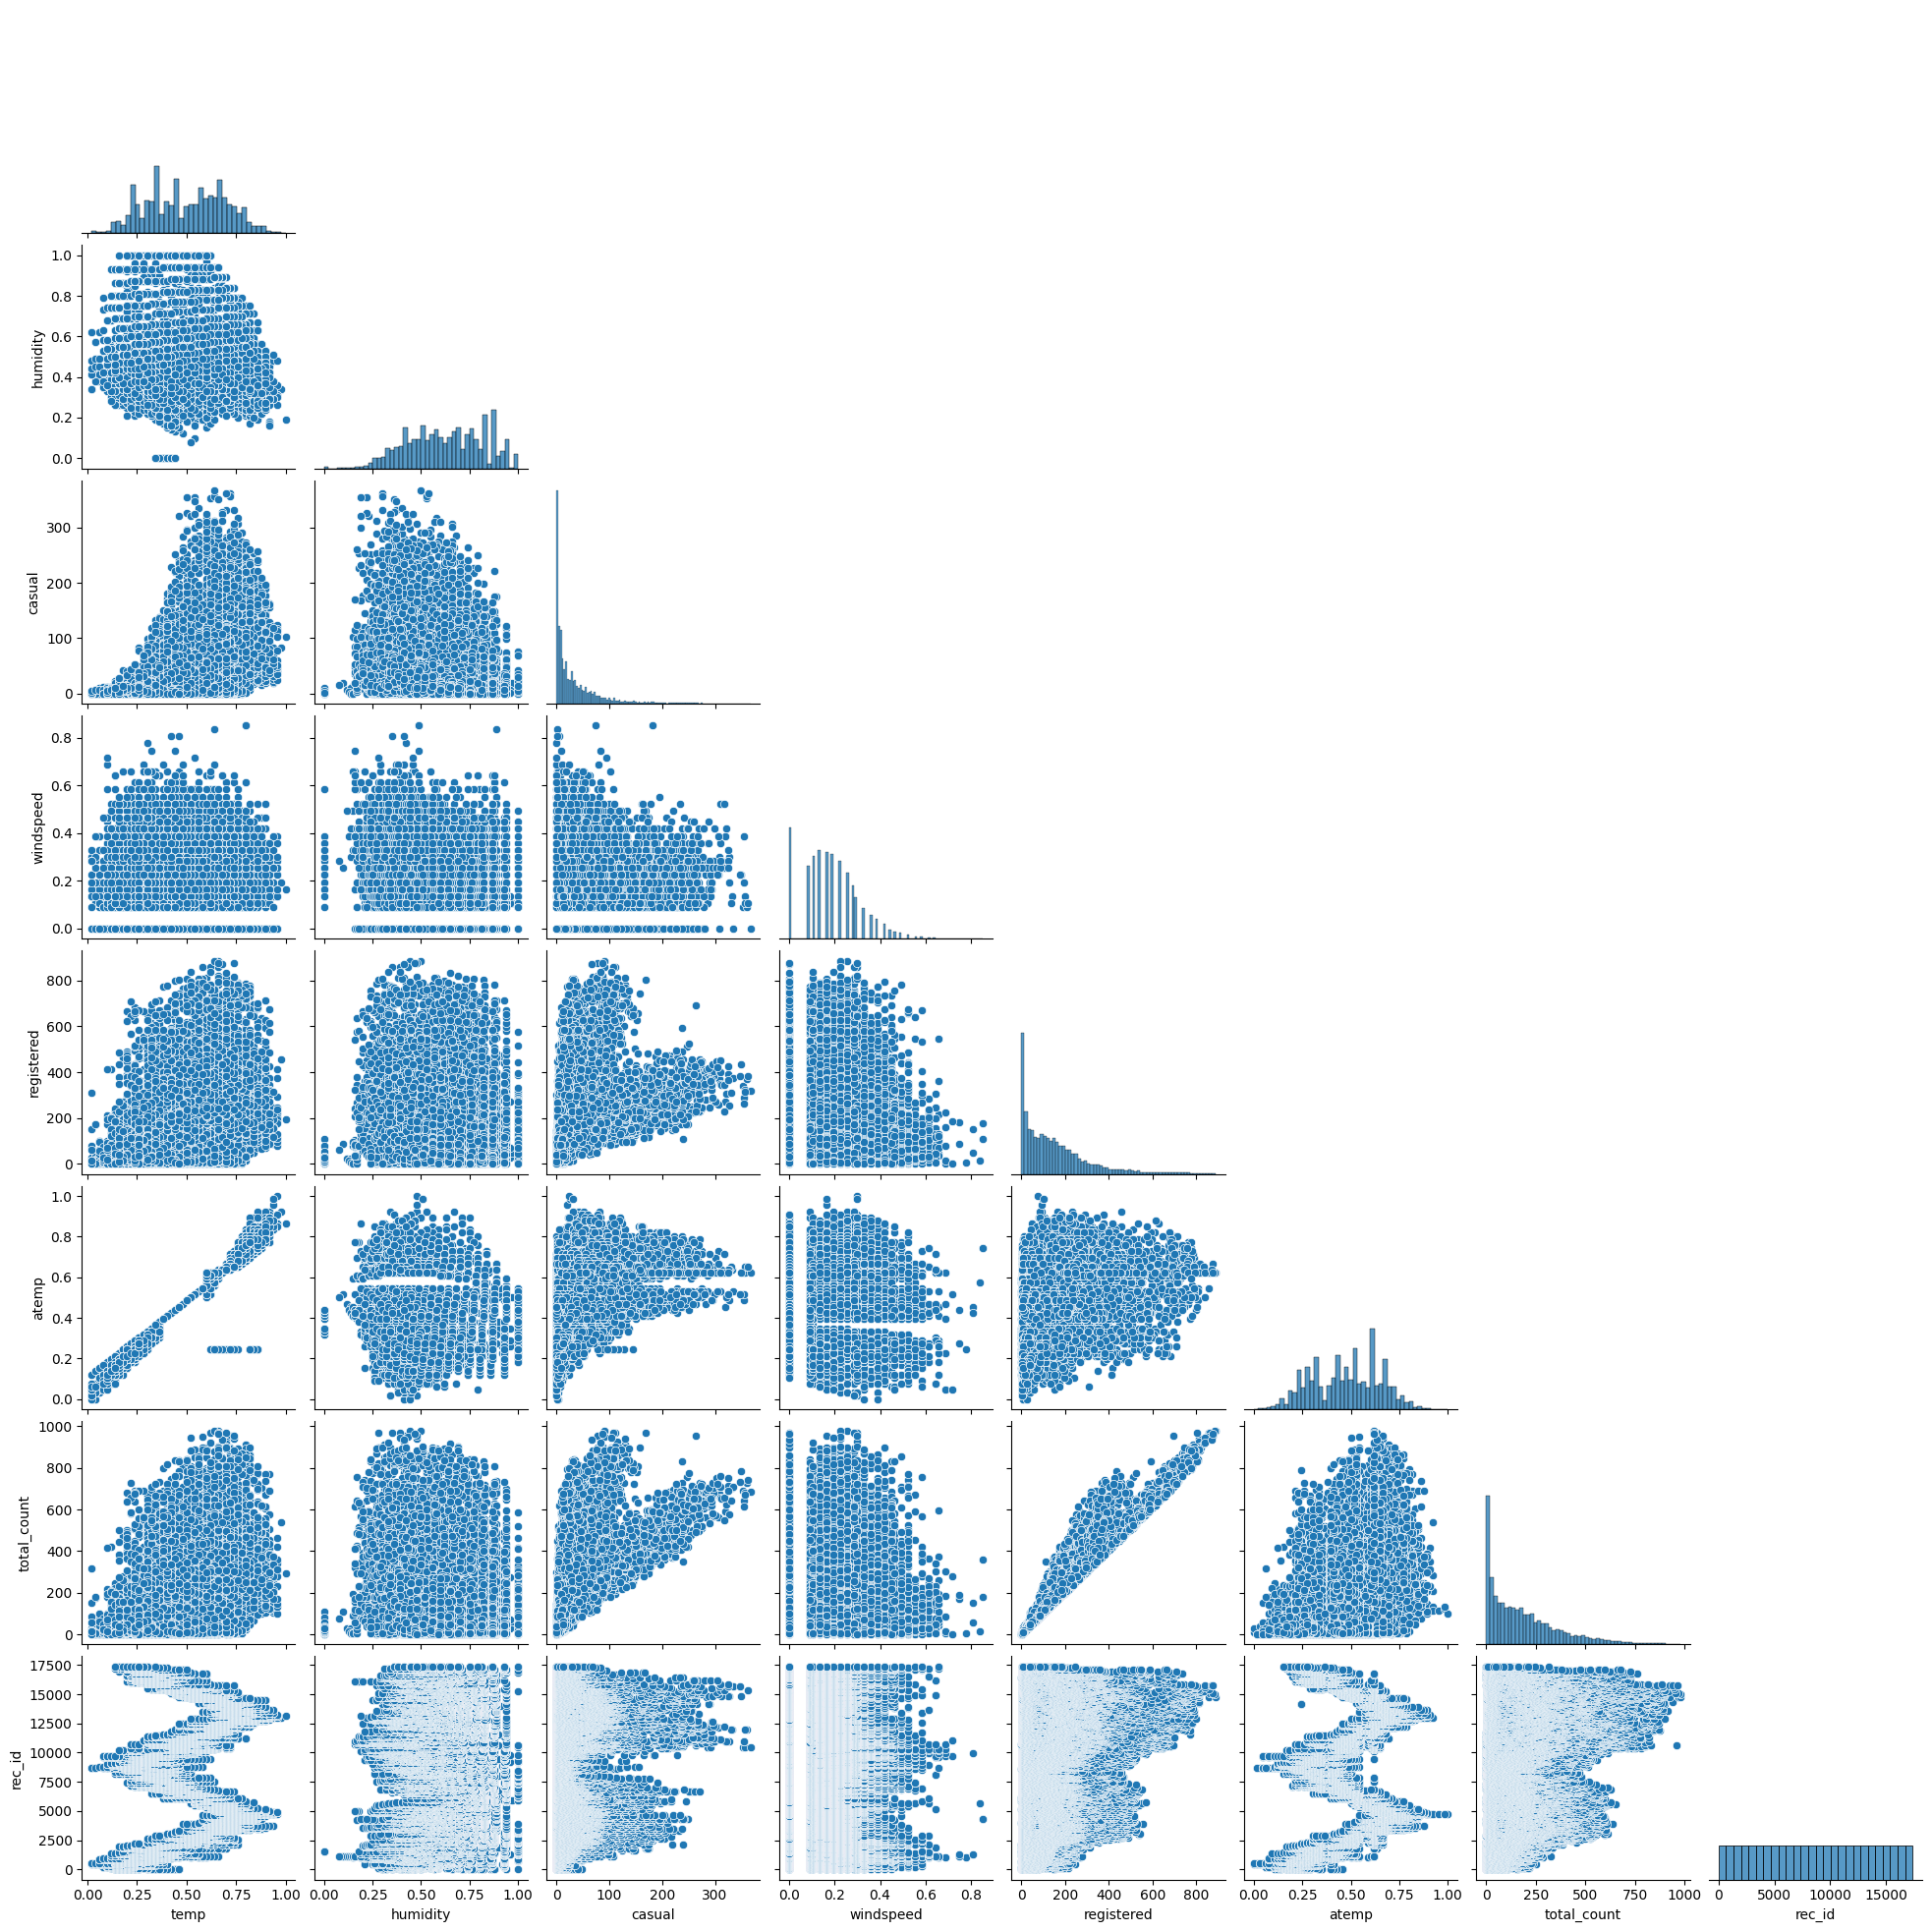

In [ ]:
# Menentukan variabel numerik yang akan dianalisis
num_vars = ["temp", "humidity", "casual", "windspeed",
            "registered", "atemp", "total_count", "rec_id"]

# Membuat pairplot untuk melihat hubungan antar variabel numerik
sns.pairplot(data=bikes_df, vars=num_vars, corner=True)

# Menampilkan plot
plt.show()

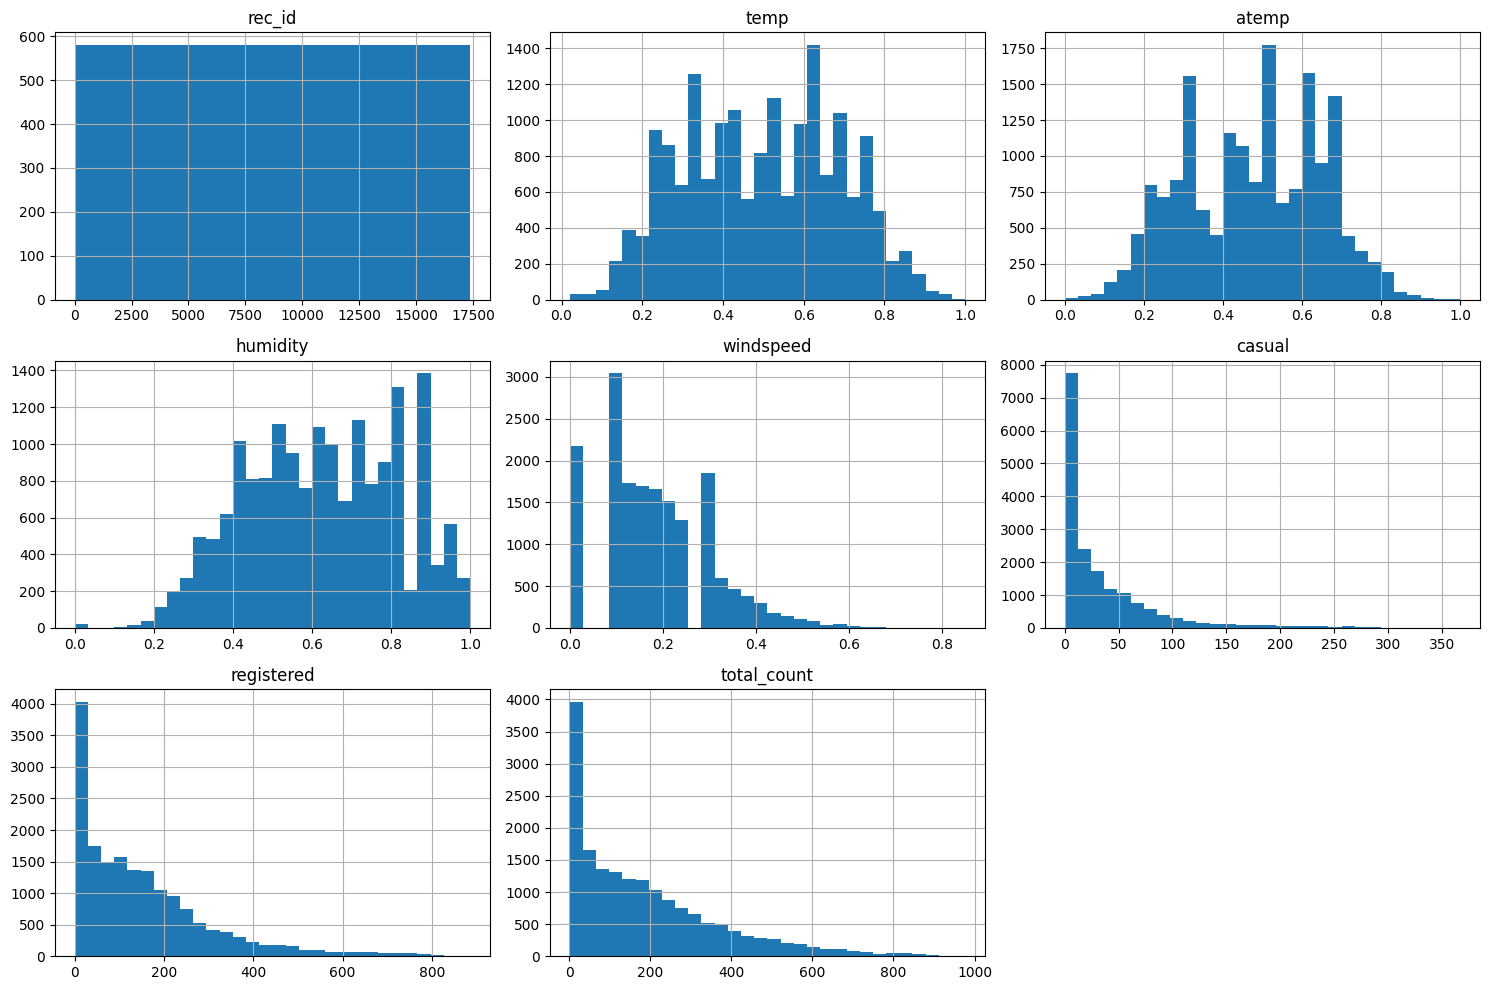

In [ ]:
import matplotlib.pyplot as plt

# Memilih kolom numerik
num_vars = bikes_df.select_dtypes(include=['number']).columns

# Membuat histogram untuk setiap variabel numerik
bikes_df[num_vars].hist(figsize=(15, 10), bins=30, layout=(len(num_vars) // 3 + 1, 3))

# Menampilkan plot
plt.tight_layout()
plt.show()

In [ ]:
bikes_df.skew(numeric_only = True)

,0
rec_id,0.000000
temp,-0.006021
atemp,-0.090429
humidity,-0.111287
windspeed,0.574905
casual,2.499237
registered,1.557904
total_count,1.277412


### Visualisasi Categorical Variables

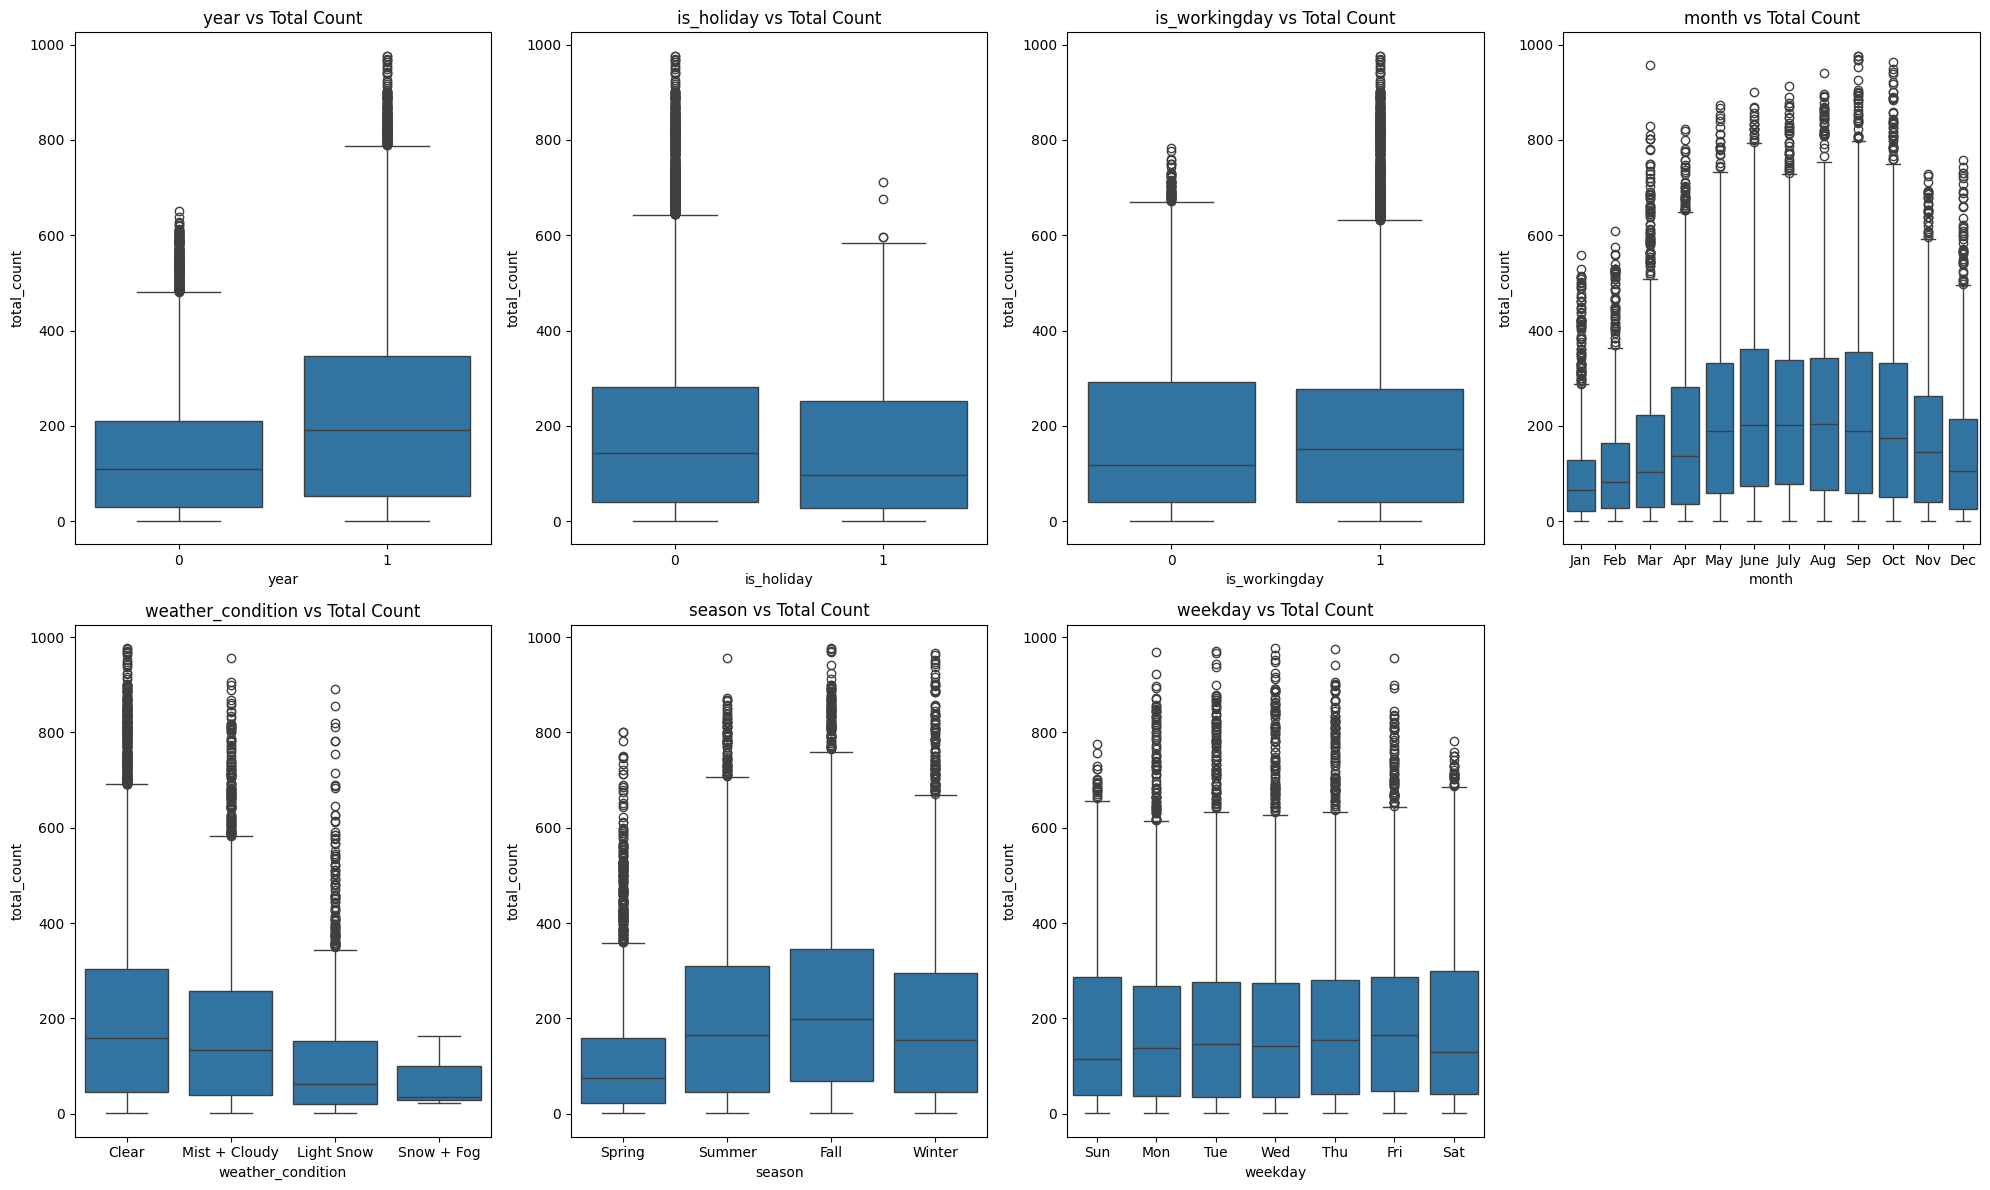

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Daftar variabel kategorikal yang akan dibandingkan dengan 'total_count'
cat_vars = ['year', 'is_holiday', 'is_workingday', 'month',
            'weather_condition', 'season', 'weekday']

# Membuat subplot secara otomatis
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 12))
axes = axes.flatten()

# Loop untuk membuat boxplot untuk setiap variabel kategorikal
for i, var in enumerate(cat_vars):
    # Filter out NaN values in 'total_count' for the current category
    filtered_data = bikes_df[bikes_df['total_count'].notna()]

    # Check if the category has enough data points to create a boxplot
    if filtered_data[var].nunique() > 0 and filtered_data['total_count'].notna().any():  # Check for sufficient data points
        sns.boxplot(x=filtered_data[var], y=filtered_data['total_count'], ax=axes[i])
        axes[i].set_title(f"{var} vs Total Count")
    else:
        print(f"Skipping boxplot for '{var}' due to insufficient data or NaN values.")

# Hapus subplot kosong jika jumlah variabel kurang dari slot subplot
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Heatmap

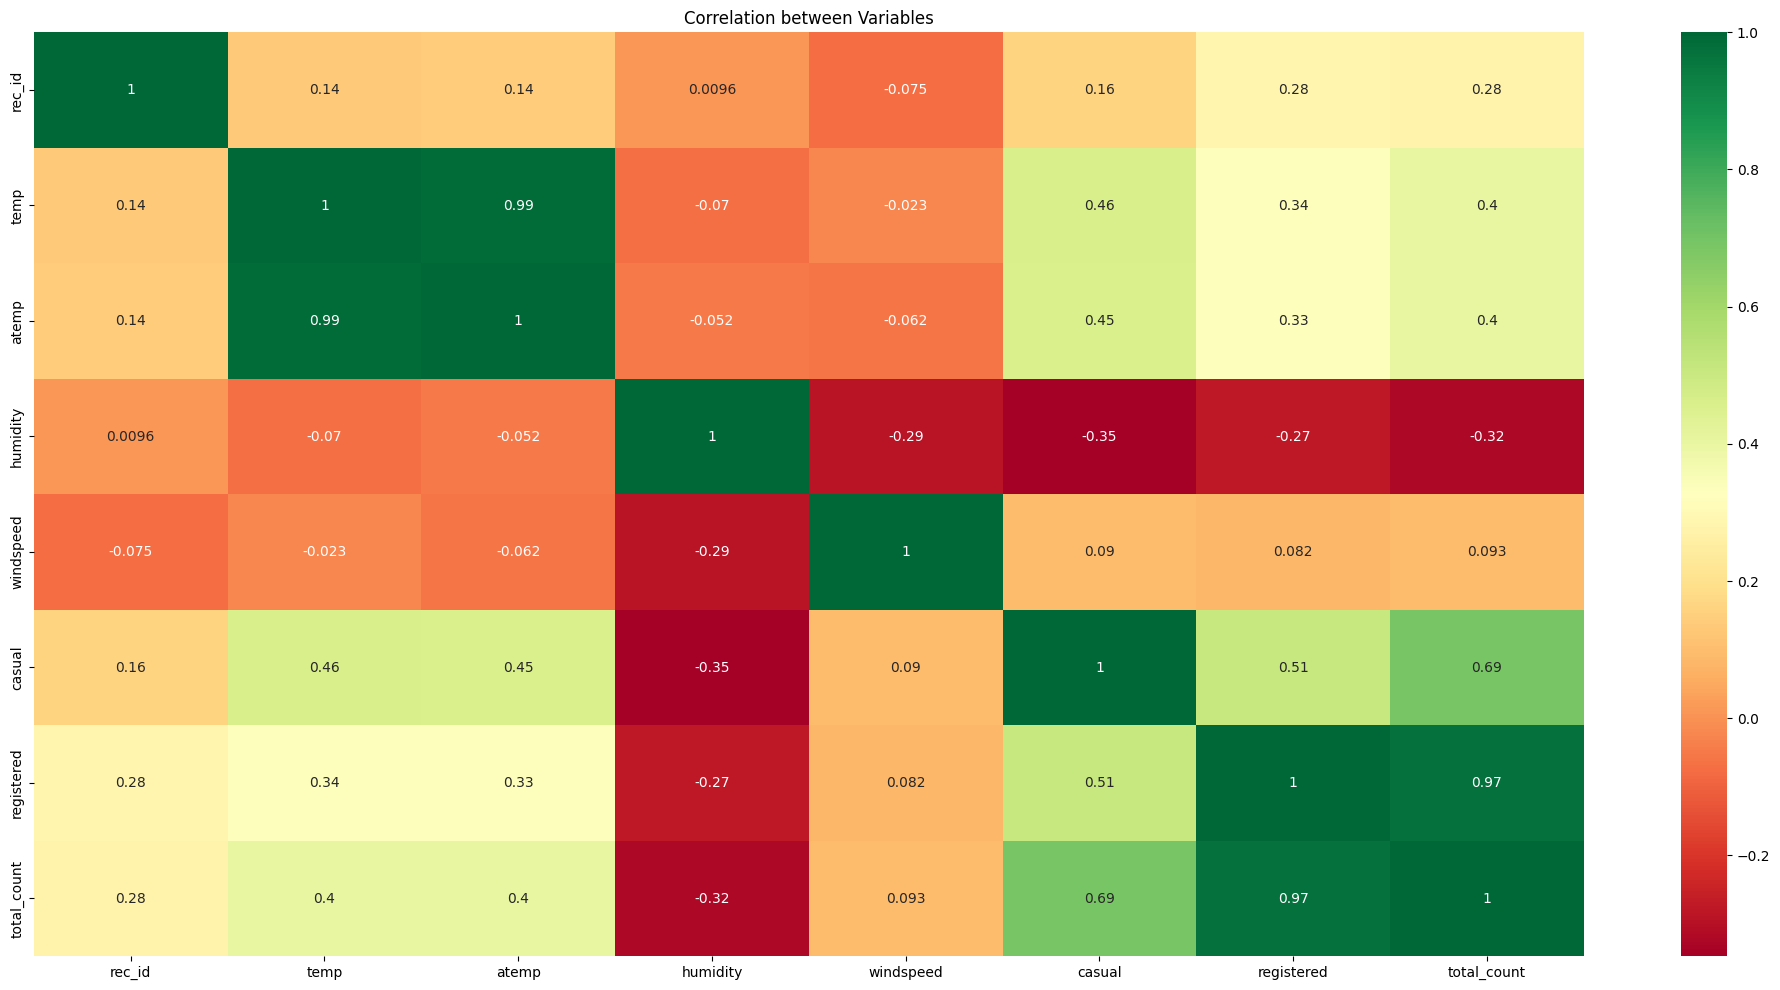

In [ ]:
#Heatmap to see correlation between variables
plt.figure(figsize=(25, 12))
sns.heatmap(bikes_df.corr(numeric_only=True), cmap='RdYlGn', annot = True) # Added numeric_only=True
plt.title("Correlation between Variables")
plt.show()

### Answer questions with visualization

#### Apakah ada perbedaan dalam peminjaman sepeda di hari kerja dan akhir pekan? Bagaimana hari libur memengaruhi tren peminjaman sepeda?

<ipython-input-113-80914d876a16>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="total_count", x="is_workingday", data=bikes_df, palette=colors, ax=ax[0])
<ipython-input-113-80914d876a16>:5: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.barplot(y="total_count", x="is_workingday", data=bikes_df, palette=colors, ax=ax[0])
<ipython-input-113-80914d876a16>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="total_count", x="is_holiday", data=bikes_df, palette=colors, ax=ax[1])
<ipython-input-113-80914d876a16>:11: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.barplot(y="total_count",

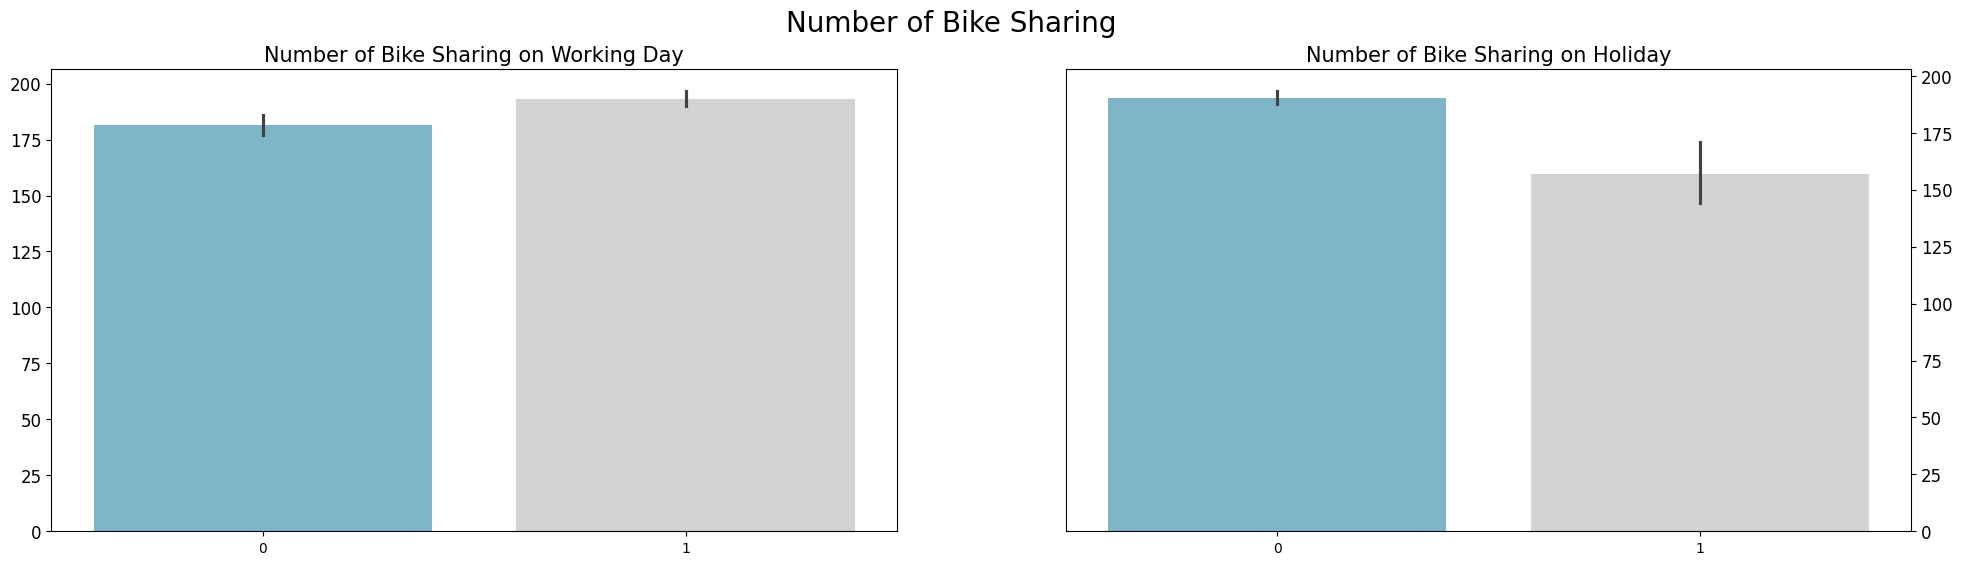

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(y="total_count", x="is_workingday", data=bikes_df, palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Number of Bike Sharing on Working Day", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(y="total_count", x="is_holiday", data=bikes_df, palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Number of Bike Sharing on Holiday", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Number of Bike Sharing", fontsize=20)
plt.show()

#### Bagaimana penggunaan sepeda berkaitan dengan waktu dalam sehari? Apakah ada puncak waktu tertentu di mana permintaan sepeda lebih tinggi?

[Text(0.5, 1.0, 'Count of Bikes During Weekdays and Weekend')]

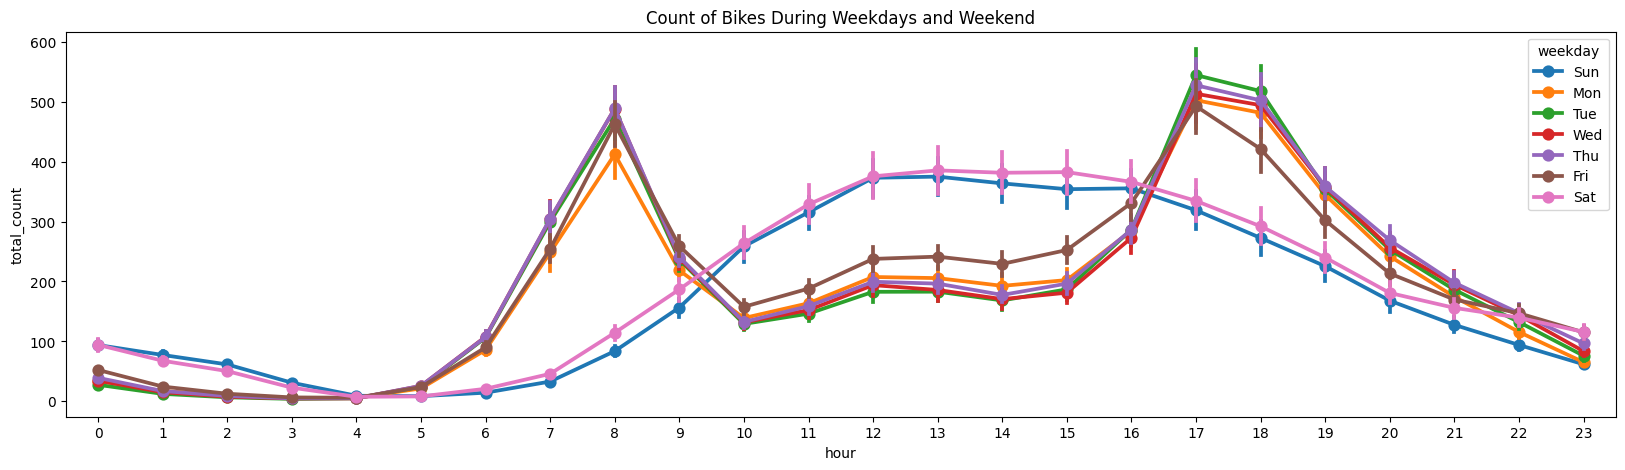

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(
    data=bikes_df,
    x='hour',
    y='total_count',
    hue='weekday',
    ax=ax
)
ax.set(title='Count of Bikes During Weekdays and Weekend')

### Conclusion

**Kesimpulan :** Berdasarkan hasil analisis data, dapat disimpulkan bahwa tren peminjaman sepeda  tertinggi terjadi di musim gugur, dengan musim panas dan dingin memiliki selisih kecil. Pemakaian lebih tinggi pada hari kerja dibanding hari libur. Puncak peminjaman terjadi pukul 8 pagi dan 5 sore, menunjukkan penggunaan utama untuk perjalanan kerja atau sekolah.

In [ ]:
bikes_df.to_csv("bikes_df.csv", index=False)